**DATA DIRI**

**NAMA : MUHAMMAD ISMAIL**

**DOMISILI : SURABAYA, JAWA TIMUR**

**TIME SERIES PROJECT**

In [ ]:
import tensorflow as tf
#mengecek version dari tensorflow
tf.__version__

'2.6.0'

**EKSTRAKSI FILE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from datetime import datetime, date

In [ ]:
!pip install kaggle

In [ ]:
#mengupload API key akun kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"mail2418","key":"784e529f058f35edd5174910c6d63425"}'}

In [ ]:
# membuat directory dari kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
#download dataset
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip dan lihat list dataset
!mkdir climate-change-earth-surface-temperature-data
!unzip climate-change-earth-surface-temperature-data.zip -d TemperatureData

mkdir: cannot create directory ‘climate-change-earth-surface-temperature-data’: File exists
Archive:  climate-change-earth-surface-temperature-data.zip
replace TemperatureData/GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TemperatureData/GlobalLandTemperaturesByCity.csv  
replace TemperatureData/GlobalLandTemperaturesByCountry.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TemperatureData/GlobalLandTemperaturesByCountry.csv  
replace TemperatureData/GlobalLandTemperaturesByMajorCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TemperatureData/GlobalLandTemperaturesByMajorCity.csv  
replace TemperatureData/GlobalLandTemperaturesByState.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TemperatureData/GlobalLandTemperaturesByState.csv  
replace TemperatureData/GlobalTemperatures.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: TemperatureData/GlobalTemperatures.csv  


**MEMBUAT DATAFRAME**


In [ ]:
#mengubah file csv yang didapatkan ke dataframe
#penambahan sep='\t' memudahkan mesin untuk membaca dataframe dan menghindari eror
df = pd.read_csv('TemperatureData/GlobalLandTemperaturesByCountry.csv')

In [ ]:
df.head(10) 

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [ ]:
df.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577452,2012-12-01,24.111,0.846,Zimbabwe
577453,2013-01-01,23.812,1.218,Zimbabwe
577454,2013-02-01,24.075,1.286,Zimbabwe
577455,2013-03-01,23.226,0.564,Zimbabwe
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
#menghilangkan nilai NaN
mean_AverageTemperature = df.AverageTemperature[246308:248572].mean()
mean_AverageTemperatureUncertainty = df.AverageTemperatureUncertainty[246308:248573].mean()
df = df.fillna(value={'AverageTemperature':mean_AverageTemperature, 
                 'AverageTemperatureUncertainty':mean_AverageTemperatureUncertainty})

In [ ]:
mean_AverageTemperatureUncertainty

0.44749866950505623

In [ ]:
mean_AverageTemperature 

25.684483767961684

**VISUALISASI DATA**

In [ ]:
 data = df.loc[(df.Country == 'Indonesia')]
 data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
246308,1825-01-01,25.915000,1.825000,Indonesia
246309,1825-02-01,25.385000,0.973000,Indonesia
246310,1825-03-01,25.687000,1.656000,Indonesia
246311,1825-04-01,26.302000,1.897000,Indonesia
246312,1825-05-01,25.705000,0.902000,Indonesia
...,...,...,...,...
248568,2013-05-01,26.818000,0.154000,Indonesia
248569,2013-06-01,26.881000,0.248000,Indonesia
248570,2013-07-01,25.902000,0.164000,Indonesia
248571,2013-08-01,25.961000,0.319000,Indonesia


In [ ]:
Visual_AverageTemperature = data.drop(columns=['AverageTemperatureUncertainty', 'Country'])
Visual_AverageTemperature

,dt,AverageTemperature
246308,1825-01-01,25.915000
246309,1825-02-01,25.385000
246310,1825-03-01,25.687000
246311,1825-04-01,26.302000
246312,1825-05-01,25.705000
...,...,...
248568,2013-05-01,26.818000
248569,2013-06-01,26.881000
248570,2013-07-01,25.902000
248571,2013-08-01,25.961000


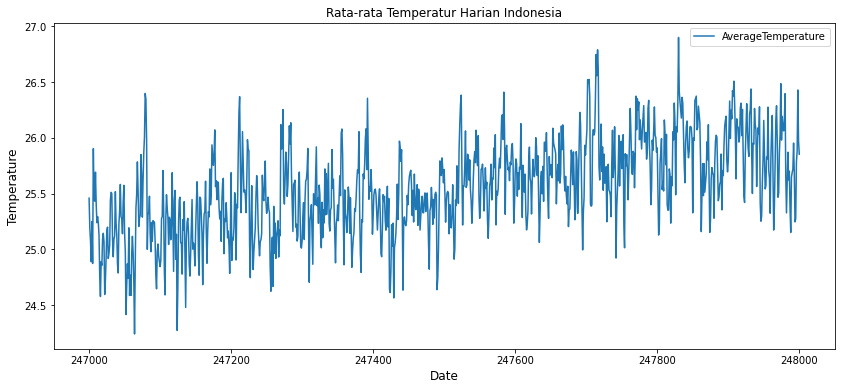

In [ ]:
Visual_AverageTemperature.iloc[692:1693].plot(title='Rata-rata Temperatur Harian Indonesia',figsize=(14,6))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.legend()

**MEMBUAT MODEL DAN MENGSCALE DATA**

In [137]:
data = Visual_AverageTemperature.loc[(Visual_AverageTemperature.dt >= '1825-01-01') & (Visual_AverageTemperature.dt <= '2013-09-01'), ['dt', 'AverageTemperature']]
data.set_index('dt', inplace= True)
data

,AverageTemperature
dt,
1825-01-01,25.915000
1825-02-01,25.385000
1825-03-01,25.687000
1825-04-01,26.302000
1825-05-01,25.705000
...,...
2013-05-01,26.818000
2013-06-01,26.881000
2013-07-01,25.902000


In [ ]:
train_sample, test_sample = train_test_split(data.values, test_size=0.2, shuffle=False)

In [ ]:
train_sample

array([[25.915],
       [25.385],
       [25.687],
       ...,
       [25.915],
       [25.873],
       [25.594]])

In [ ]:
test_sample

array([[25.154     ],
       [25.539     ],
       [25.747     ],
       [25.964     ],
       [26.286     ],
       [25.663     ],
       [25.44      ],
       [25.567     ],
       [26.136     ],
       [25.864     ],
       [26.117     ],
       [25.893     ],
       [25.742     ],
       [25.443     ],
       [25.879     ],
       [26.119     ],
       [26.19      ],
       [25.714     ],
       [25.61      ],
       [25.41      ],
       [26.139     ],
       [26.142     ],
       [26.426     ],
       [26.016     ],
       [25.802     ],
       [25.971     ],
       [26.201     ],
       [26.102     ],
       [26.534     ],
       [25.992     ],
       [25.693     ],
       [26.092     ],
       [25.752     ],
       [25.841     ],
       [26.095     ],
       [25.746     ],
       [25.898     ],
       [26.081     ],
       [26.136     ],
       [26.263     ],
       [26.592     ],
       [26.082     ],
       [25.536     ],
       [26.046     ],
       [26.02      ],
       [26

In [192]:
scaler = MinMaxScaler()
train_scale = scaler.fit_transform(train_sample.reshape(-1, 1))
test_scale = scaler.fit_transform(test_sample.reshape(-1, 1))

In [193]:
train_scale.shape

(1812, 1)

In [194]:
split=int((1-0.2)*len(data))

date_train = data.index[:split]
date_test = data.index[split:]

In [195]:
len= 30
train_gen = TimeseriesGenerator(train_scale, train_scale, length=len, batch_size=20)     
test_gen = TimeseriesGenerator(test_scale, test_scale, length=len, batch_size=1)

In [196]:
#mengecek apakah masih ada null
data.isnull().sum()

AverageTemperature    0
dtype: int64

In [187]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True, activation='relu', input_shape=(len, 1)),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 30, 60)            14880     
_________________________________________________________________
lstm_35 (LSTM)               (None, 60)                29040     
_________________________________________________________________
dense_48 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 46,071
Trainable params: 46,071
Non-trainable params: 0
_________________________________________________

In [188]:
#membuat callback agar menghentikan epoch bila akurasi sesuai dengan yang diinginkan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 0.1):
      print("\n Mean Absolute Error < 10%!")
      self.model.stop_training = True
callbacks = myCallback()

In [190]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit_generator(train_gen, 
                    epochs= 150, 
                    verbose=1, 
                    callbacks=[callbacks], 
                    steps_per_epoch = 2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
2/2 [==============================] - 3s 31ms/step - loss: 0.0197 - mae: 0.1689
Epoch 2/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0071 - mae: 0.0863
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0067 - mae: 0.0827
Epoch 4/150
2/2 [==============================] - 0s 31ms/step - loss: 0.0148 - mae: 0.1288
Epoch 5/150
2/2 [==============================] - 0s 38ms/step - loss: 0.0125 - mae: 0.1266
Epoch 6/150
2/2 [==============================] - 0s 34ms/step - loss: 0.0060 - mae: 0.0882
Epoch 7/150
2/2 [==============================] - 0s 34ms/step - loss: 0.0081 - mae: 0.1110
Epoch 8/150
2/2 [==============================] - 0s 31ms/step - loss: 0.0064 - mae: 0.0662
Epoch 9/150
2/2 [==============================] - 0s 34ms/step - loss: 0.0077 - mae: 0.0988
Epoch 10/150
2/2 [==============================] - 0s 33ms/step - loss: 0.0099 - mae: 0.1122
Epoch 11/150
2/2 [==============================] - 0s 33ms/step - lo

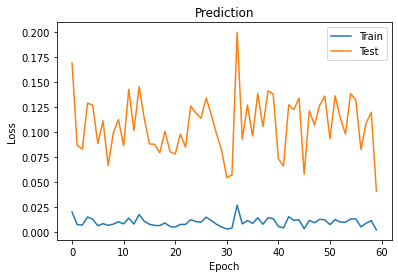

In [191]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('Prediction')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


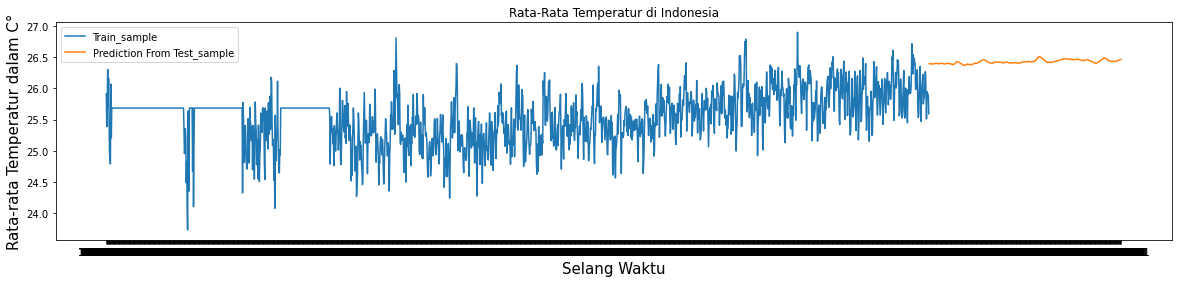

In [199]:
pred = scaler.inverse_transform(model.predict_generator(test_gen))

plt.figure(figsize=(20,4))
plt.plot(date_train, train_sample, label = "Train_sample")
plt.plot(date_test[:-len], pred, label = "Prediction From Test_sample")
plt.title('Rata-Rata Temperatur di Indonesia')

plt.xlabel('Selang Waktu',fontsize=15)
plt.ylabel('Rata-rata Temperatur dalam C°',fontsize=15)
plt.legend()
plt.show()